# IMPORTAR E VISUALIZAR IMAGENS

### Neste exercício utilizaremos o conjunto de dados da FEI.
- Faça o download do conjunto de dados: https://fei.edu.br/~cet/frontalimages_manuallyaligned_part1.zip
- Descompacte o conjunto e dados no mesmo diretório deste arquivo

### No primeiro exemplo vamos importar uma imagem com a biblioteca Pillow
- Utilizaremos a função **open()**, da classe **Image**, que retorna um objeto de imagem que contém os dados de pixel da imagem

##### Passo 1: Importar as bibliotecas necessárias

In [13]:
# !pip install pillow
from PIL import Image

##### Passo 2: Importar uma imagem da conjunto de dados

In [14]:
# Carregando a imagem
file = Image.open('frontalimages_manuallyaligned_part1/1b.jpg')

##### Passo 3: Visualizar imagem

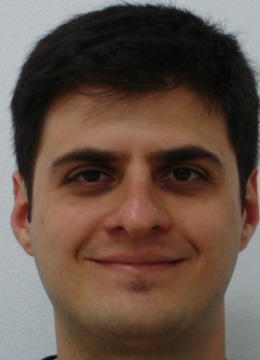

In [15]:
file

##### Passo 4: Visualizar as propriedades da imagem

In [16]:
print(file.mode) 

RGB


In [17]:
print(file.format) 

JPEG


In [18]:
print(file.size)

(260, 360)


### No segundo exemplo vamos importar uma imagem com a biblioteca Matplotlib
- utilizares a função **mpimg** do módulo **matplotlib.image** que nos permite carregar uma imagem como um **numpy.ndarray 3D**, sendo cada dimensão um canal de cor, **RED**, **GREEN**, **BLUE** e cada lista interna representa um pixel.

##### Passo 1: Importar as bibliotecas necessárias

In [1]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

##### Passo 2: Importar uma imagem da conjunto de dados

In [2]:
data = mpimg.imread('frontalimages_manuallyaligned_part1/1b.jpg')

##### Passo 3: Visualizar array

In [3]:
data

array([[[184, 189, 193],
        [184, 189, 193],
        [183, 188, 192],
        ...,
        [180, 185, 191],
        [178, 183, 189],
        [177, 182, 188]],

       [[184, 189, 193],
        [185, 190, 194],
        [185, 190, 194],
        ...,
        [180, 185, 191],
        [180, 185, 191],
        [180, 185, 191]],

       [[183, 188, 192],
        [185, 190, 194],
        [185, 190, 194],
        ...,
        [180, 185, 191],
        [181, 186, 192],
        [182, 187, 193]],

       ...,

       [[158, 166, 169],
        [156, 164, 167],
        [158, 166, 169],
        ...,
        [122, 126, 127],
        [122, 128, 128],
        [123, 129, 129]],

       [[157, 165, 168],
        [156, 164, 167],
        [159, 167, 170],
        ...,
        [120, 126, 126],
        [120, 126, 126],
        [119, 128, 127]],

       [[157, 165, 168],
        [158, 166, 169],
        [160, 168, 171],
        ...,
        [121, 127, 127],
        [119, 128, 127],
        [120, 129, 128]]

##### Passo 4: Visualizar as propriedades da array

In [4]:
type(data)

numpy.ndarray

In [5]:
data.dtype

dtype('uint8')

In [6]:
data.shape

(360, 260, 3)

##### Passo 5: Visualizar a array de pixels como uma imagem

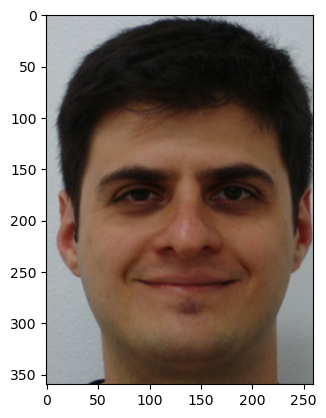

In [9]:
plt.imshow(data)
plt.show()

### No terceiro exemplo vamos utilizar as bibliotecas Pillow, Matplotlib e Numpy
Neste exemplo vamos carregar uma imagem com a função **open()** e iremos converter a imagem em tons de cinza com a função **convert('L')**, em seguida utilizaremos a função **np.array()** para carregarmos a imagem como um **numpy.ndarray**.

##### Passo 1: Importar as bibliotecas necessárias

In [10]:
import numpy as np

##### Passo 2: Importar uma imagem da conjunto de dados

In [19]:
#Carrega a imagem
imagem = Image.open('frontalimages_manuallyaligned_part1/1b.jpg')
#converte em tons de cinzas
imagem_tons_cinzas = imagem.convert("L")
#converte em array
data = np.array(imagem_tons_cinzas)

##### Passo 3: Visualizar imagem em tons de cinza e dimensão da array

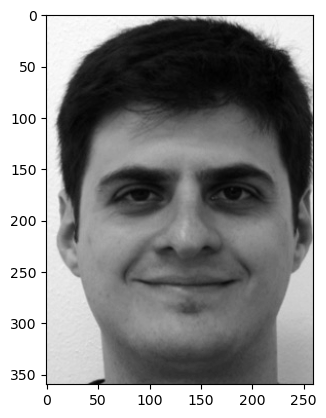

In [21]:
plt.imshow(data, cmap = "gray")
plt.show()

In [22]:
data.shape

(360, 260)

### No quarto exemplo iremos carregar multiplas imagens como array
Neste exemplo, além das bibliotecas anteriores, vamos utilizar a biblioteca **glob** para listar os arquivos do diretório. 

##### Passo 1: Importar as bibliotecas necessárias

In [23]:
import glob

##### Passo 2: Criar um conjunto de dados com todas as imagens do diretório

In [24]:
dataset = []

for file in glob.glob('frontalimages_manuallyaligned_part1/*.jpg'):
    load_file = Image.open(file)
    load_file = load_file.convert("L")
    load_file = np.array(load_file)
    dataset.append(load_file)
dataset = np.array(dataset)

In [27]:
dataset.shape

(200, 360, 260)

##### Passo 3: Visualizar imagens do conjunto de dados pelo índice

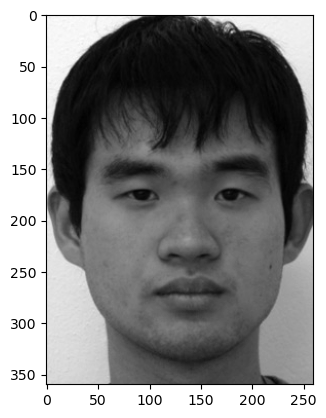

In [33]:
plt.imshow(dataset[2,:,:], cmap = "gray")
plt.show()

# Imagem média do conjunto de dados
- Nesta etapa iremos obter um primeiro padrão, calculando a imagem média do conjunto de dados

In [35]:
lx = dataset.shape[1]
ly = dataset.shape[2]

mean_file = np.zeros([lx, ly])

for x in range(lx):
    for y in range(ly):
        mean_file[x,y] = round(np.mean(dataset[:,x,y]))

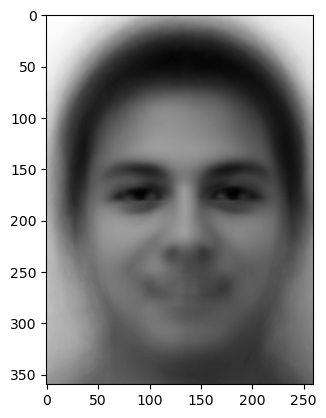

In [36]:
    plt.imshow(mean_file, cmap = "gray")
    plt.show()

## Subconjuntos da classe de Faces
- No conjunto de dados de face da FEI há dois subconjuntos, sendo um de faces neutras e outro de faces sorrindo
- Vamos repetir o processo anterir para calcular a imagem média de cada classe

In [37]:
dataset_neutral = []

for file in glob.glob('frontalimages_manuallyaligned_part1/*a.jpg'):
    load_file = Image.open(file)
    load_file = load_file.convert("L")
    load_file = np.array(load_file)
    dataset_neutral.append(load_file)
dataset_neutral = np.array(dataset_neutral)

In [38]:
dataset_neutral.shape

(100, 360, 260)

In [39]:
lx = dataset_neutral.shape[1]
ly = dataset_neutral.shape[2]

mean_file_neutral = np.zeros([lx, ly])

for x in range(lx):
    for y in range(ly):
        mean_file_neutral[x,y] = round(np.mean(dataset_neutral[:,x,y]))

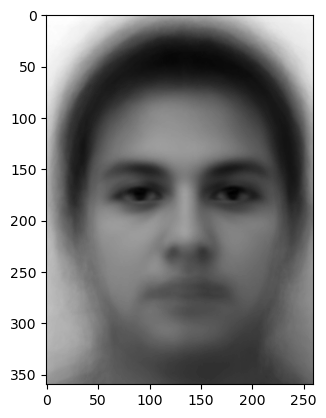

In [42]:
plt.imshow(mean_file_neutral, cmap = "gray")
plt.show()

In [43]:
dataset_smiling = []

for file in glob.glob('frontalimages_manuallyaligned_part1/*b.jpg'):
    load_file = Image.open(file)
    load_file = load_file.convert("L")
    load_file = np.array(load_file)
    dataset_smiling.append(load_file)
dataset_smiling = np.array(dataset_smiling)

In [47]:
dataset_smiling.shape

(100, 360, 260)

In [45]:
lx = dataset_smiling.shape[1]
ly = dataset_smiling.shape[2]

mean_file_smiling = np.zeros([lx, ly])

for x in range(lx):
    for y in range(ly):
        mean_file_smiling[x,y] = round(np.mean(dataset_smiling[:,x,y]))

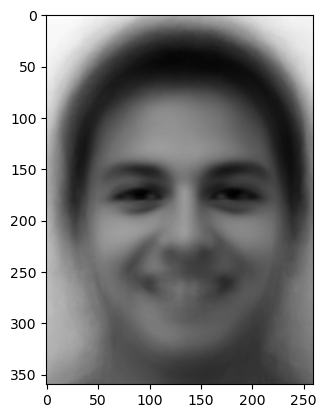

In [48]:
plt.imshow(mean_file_smiling, cmap = "gray")
plt.show()

##### Visualização das imagens médias por categoria

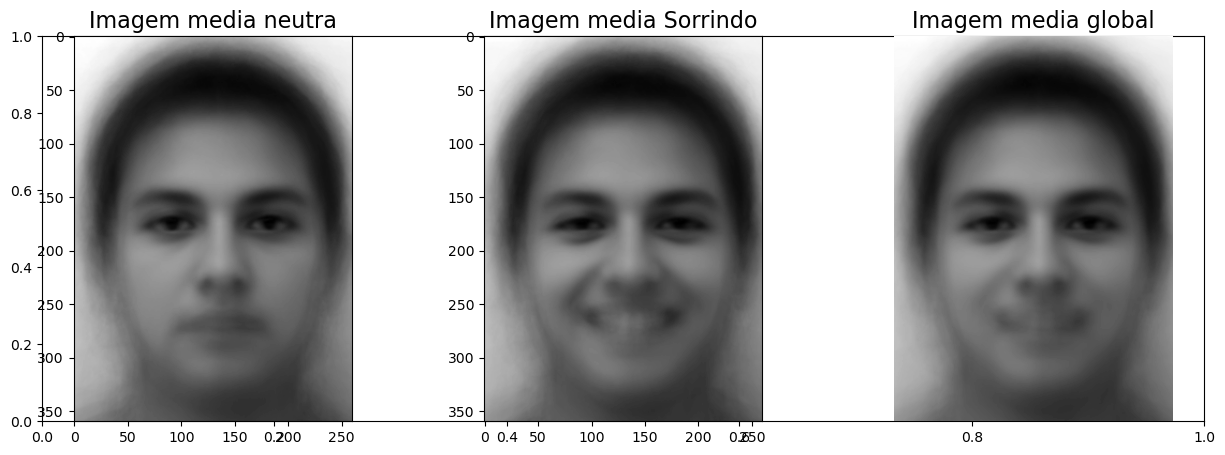

In [52]:
plt.subplots(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(mean_file_neutral, cmap = "gray")
plt.title('Imagem media neutra',fontsize = 16)


plt.subplot(1,3,2)
plt.imshow(mean_file_smiling, cmap = "gray")
plt.title('Imagem media Sorrindo',fontsize = 16)


plt.subplot(1,3,3)
plt.imshow(mean_file, cmap = "gray")
plt.title('Imagem media global',fontsize = 16)
plt.axis("off")

plt.show()

## Distância Euclidiana da Média
- Nesta etapa iremos calcular a distância Euclidiana entre cada imagem do conjunto de dados com relação a imagem média.

In [56]:
diferenca = dataset[23,:,:]-mean_file

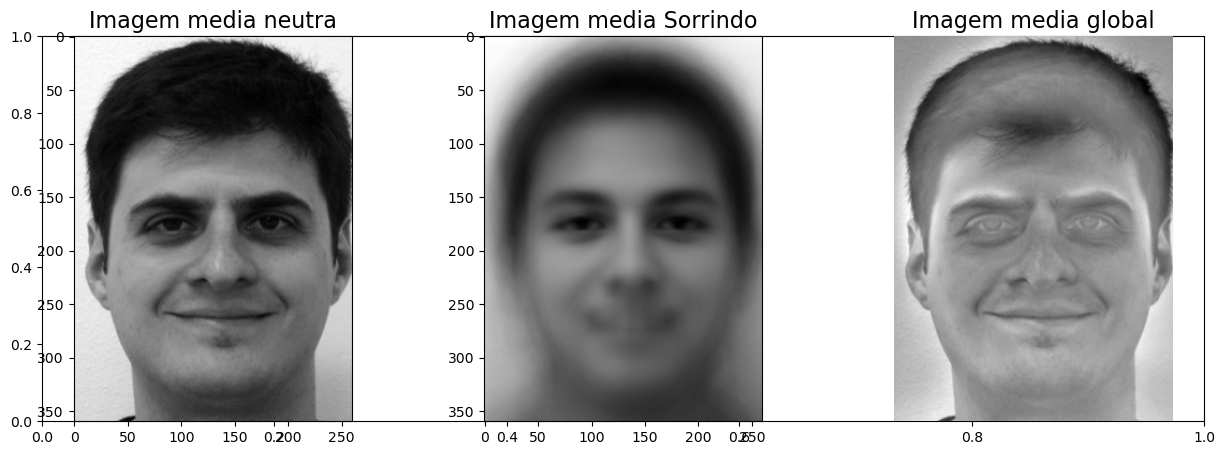

In [59]:
plt.subplots(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow( dataset[23,:,:], cmap = "gray")
plt.title('Imagem media neutra',fontsize = 16)


plt.subplot(1,3,2)
plt.imshow(mean_file, cmap = "gray")
plt.title('Imagem media Sorrindo',fontsize = 16)


plt.subplot(1,3,3)
plt.imshow(diferenca, cmap = "gray")
plt.title('Imagem media global',fontsize = 16)
plt.axis("off")

plt.show()

In [58]:
diferenca

array([[-4., -4., -5., ..., -5., -7., -8.],
       [-4., -3., -3., ..., -3., -4., -4.],
       [-5., -3., -3., ..., -2., -2., -1.],
       ...,
       [44., 42., 45., ..., 41., 41., 41.],
       [44., 43., 46., ..., 41., 40., 40.],
       [44., 45., 47., ..., 44., 43., 43.]])

Observem que alguns pixels vão receber valores negativos, pois o valor do pixel local da imagem média pode ser maior que o valor do pixel da imagem original.

Vejamos essa diferença pelo histograma das imagens

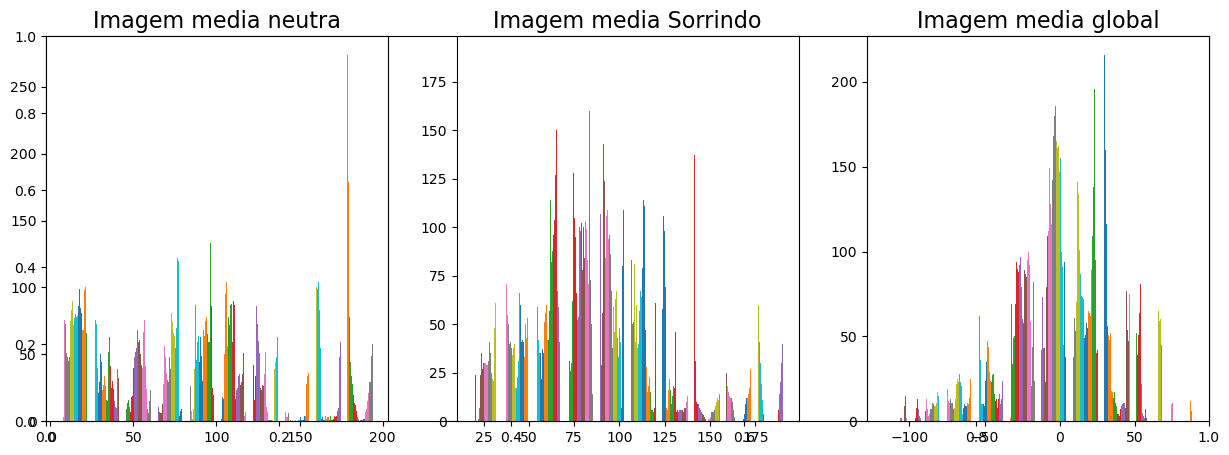

In [62]:
plt.subplots(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist( dataset[23,:,:])
plt.title('Imagem media neutra',fontsize = 16)

plt.subplot(1,3,2)
plt.hist(mean_file)
plt.title('Imagem media Sorrindo',fontsize = 16)

plt.subplot(1,3,3)
plt.hist(diferenca)
plt.title('Imagem media global',fontsize = 16)

plt.show()

### Difença absoluta

A diferença absoluta de cada imagem pode ser obtida pela somatória do módulo da diferença entre a cada imagem e a imagem média, conforme equação a seguir, em que **I** repesenta uma imagem da lista e **M** a imagem média.
$$∑|I_{ji}-M_{ji}|$$


In [63]:
np.sum(abs(dataset[23,:,:]-mean_file))

2316674.0

### Obtendo a diferença absoluta de todas as imagens

In [71]:
    indice = dataset_neutral.shape[0]
    
    # criar variavel para armazenar a diferençadas imagens
    dif_neutral_mean_file = np.zeros([indice])
    dif_neutral_mean_neutral = np.zeros([indice])
    dif_neutral_mean_smiling = np.zeros([indice])
    
    for img in range(indice):
        dif_neutral_mean_file[img] = np.sum(abs(dataset_neutral[img,:,:]-mean_file))
        dif_neutral_mean_neutral[img]  = np.sum(abs(dataset_neutral[img,:,:]-mean_file_neutral))
        dif_neutral_mean_smiling[img]  = np.sum(abs(dataset_neutral[img,:,:]-mean_file_smiling))

In [72]:
dif_neutral = np.stack((dif_neutral_mean_file,dif_neutral_mean_neutral,dif_neutral_mean_smiling), axis = 1)
dif_neutral

array([[2943841., 2964851., 2964449.],
       [2475473., 2462849., 2551127.],
       [3373776., 3328382., 3428954.],
       [2258846., 2287434., 2237938.],
       [2925115., 2887657., 2982289.],
       [2454897., 2446857., 2498661.],
       [2756211., 2749261., 2774953.],
       [3541595., 3596115., 3490745.],
       [2405091., 2362695., 2481527.],
       [2361438., 2369804., 2411448.],
       [2605467., 2613037., 2649351.],
       [2310059., 2258473., 2380065.],
       [2003572., 2016978., 2048734.],
       [2702799., 2690811., 2744301.],
       [2201709., 2230061., 2229247.],
       [1979130., 2017304., 1992012.],
       [2374187., 2372433., 2409689.],
       [2209117., 2252979., 2202227.],
       [2457038., 2481206., 2498356.],
       [2547445., 2464615., 2638589.],
       [3725334., 3701202., 3755664.],
       [2782046., 2735178., 2837834.],
       [2931110., 2867334., 3007448.],
       [2637479., 2658717., 2648023.],
       [2640590., 2585362., 2714538.],
       [2565946., 2520490

### Repetindo o processo para as imagens da classe sorrindo

In [67]:
indice = dataset_smiling.shape[0]

# criar variavel para armazenar a diferençadas imagens
dif_smiling_mean_file = np.zeros([indice])
dif_smiling_mean_neutral = np.zeros([indice])
dif_smiling_mean_smiling = np.zeros([indice])

for img in range(indice):
    dif_smiling_mean_file[img] = np.sum(abs(dataset_smiling[img,:,:]-mean_file))
    dif_smiling_mean_neutral[img]  = np.sum(abs(dataset_smiling[img,:,:]-mean_file_neutral))
    dif_smiling_mean_smiling[img]  = np.sum(abs(dataset_smiling[img,:,:]-mean_file_smiling))

In [68]:
dif_smiling = np.stack((dif_smiling_mean_file,dif_smiling_mean_neutral,dif_smiling_mean_smiling), axis = 1)
dif_smiling

array([[3173310., 3275342., 3090230.],
       [2400789., 2435699., 2383279.],
       [3268546., 3253630., 3313932.],
       [2215522., 2245048., 2192388.],
       [2941112., 2982178., 2927484.],
       [2361758., 2367874., 2390264.],
       [2937822., 3004434., 2901422.],
       [3543559., 3605207., 3484761.],
       [2245805., 2290055., 2240627.],
       [2348994., 2376610., 2345134.],
       [2657467., 2676685., 2688935.],
       [2316674., 2366802., 2301608.],
       [2088258., 2133474., 2056334.],
       [2614660., 2663972., 2608332.],
       [2454240., 2542858., 2375970.],
       [2072153., 2120689., 2036781.],
       [2278021., 2341305., 2253935.],
       [2392717., 2463101., 2340227.],
       [2321064., 2359708., 2308326.],
       [2563356., 2522554., 2638658.],
       [3707833., 3748807., 3698935.],
       [2688327., 2720665., 2694085.],
       [2708367., 2684027., 2759261.],
       [2661349., 2696135., 2663413.],
       [2459844., 2490124., 2469162.],
       [2574847., 2618721

### Visualização das diferenças

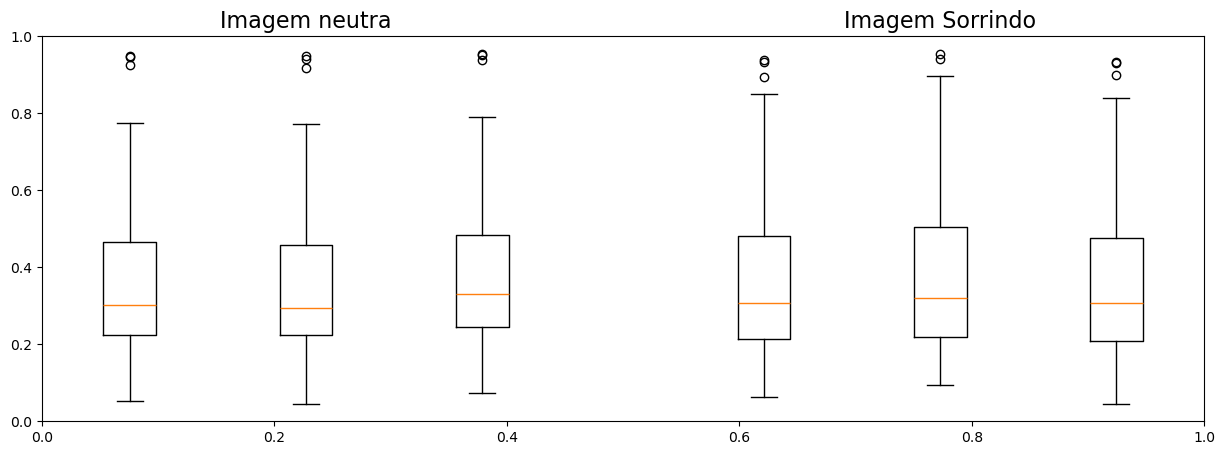

In [73]:
plt.subplots(figsize=(15,5))

plt.subplot(1,2,1)
plt.boxplot(dif_neutral)
plt.title('Imagem neutra',fontsize = 16)
plt.axis("off")

plt.subplot(1,2,2)
plt.boxplot(dif_smiling)
plt.title('Imagem Sorrindo',fontsize = 16)
plt.axis("off")

plt.show()

### Visualizando os dados com SEABORN

##### Passo 1: Importar as bibliotecas necessárias

In [74]:
import seaborn as sns

##### Passo 2: Configuração dos dados de visualização

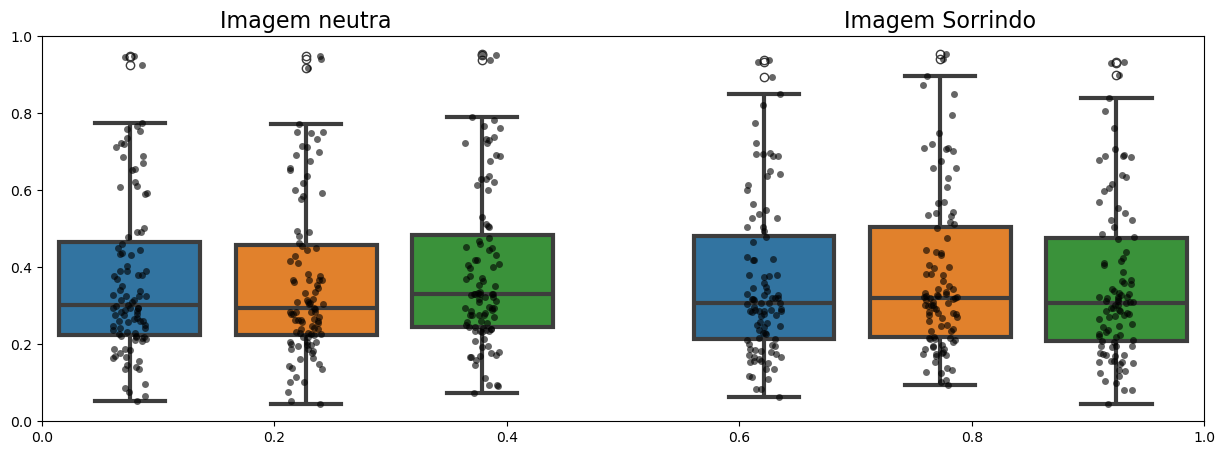

In [80]:
plt.subplots(figsize=(15,5))

# Ajusta o número de cores conforme o número de colunas
colors = sns.color_palette("tab10", n_colors=3)


plt.subplot(1,2,1)
plt.title('Imagem neutra', fontsize=16)
plt.axis("off")
sns.boxplot(data=dif_neutral, linewidth=3, palette=colors)
sns.stripplot(data=dif_neutral, color='black', alpha=0.6)

plt.subplot(1,2,2)
plt.title('Imagem Sorrindo', fontsize=16)
plt.axis("off")
sns.boxplot(data=dif_smiling, linewidth=3, palette=colors)
sns.stripplot(data=dif_smiling, color='black', alpha=0.6)

plt.show()

# EXERCÍCIO

Nós vimos nos passos anteriores como calcular a média das imagens e a respectiva distância entre cada imagem.
- Considere repitir esses passos para calcular a diferença entre as imagens a partir de outros padrões como a **mediana** e a **moda**, ao final, compare os resultados.

## Mediana

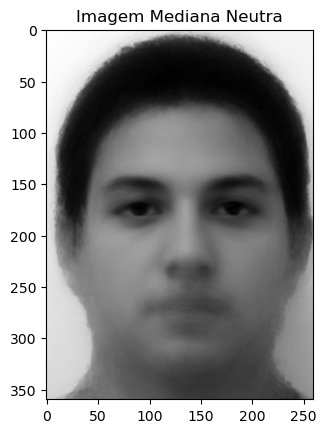

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob

# =============================
# 🧠 Dataset neutro
# =============================
dataset_neutral = []
for file in glob.glob('frontalimages_manuallyaligned_part1/*a.jpg'):
    load_file = Image.open(file)
    load_file = load_file.convert("L")  # escala de cinza
    load_file = np.array(load_file)
    dataset_neutral.append(load_file)
dataset_neutral = np.array(dataset_neutral)

lx = dataset_neutral.shape[1]
ly = dataset_neutral.shape[2]

# Calcular imagem mediana neutra
median_file_neutral = np.zeros([lx, ly])

for x in range(lx):
    for y in range(ly):
        median_file_neutral[x, y] = np.median(dataset_neutral[:, x, y])

plt.imshow(median_file_neutral, cmap="gray")
plt.title("Imagem Mediana Neutra")
plt.show()



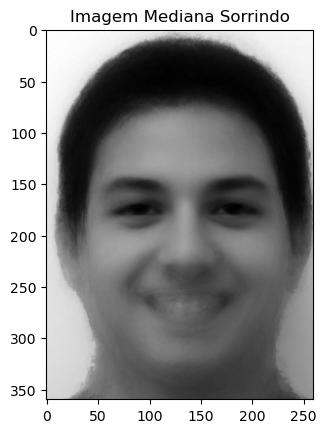

In [83]:
# =============================
# 😁 Dataset sorrindo
# =============================
dataset_smiling = []
for file in glob.glob('frontalimages_manuallyaligned_part1/*b.jpg'):
    load_file = Image.open(file)
    load_file = load_file.convert("L")
    load_file = np.array(load_file)
    dataset_smiling.append(load_file)
dataset_smiling = np.array(dataset_smiling)

lx = dataset_smiling.shape[1]
ly = dataset_smiling.shape[2]

# Calcular imagem mediana sorrindo
median_file_smiling = np.zeros([lx, ly])

for x in range(lx):
    for y in range(ly):
        median_file_smiling[x, y] = np.median(dataset_smiling[:, x, y])

plt.imshow(median_file_smiling, cmap="gray")
plt.title("Imagem Mediana Sorrindo")
plt.show()



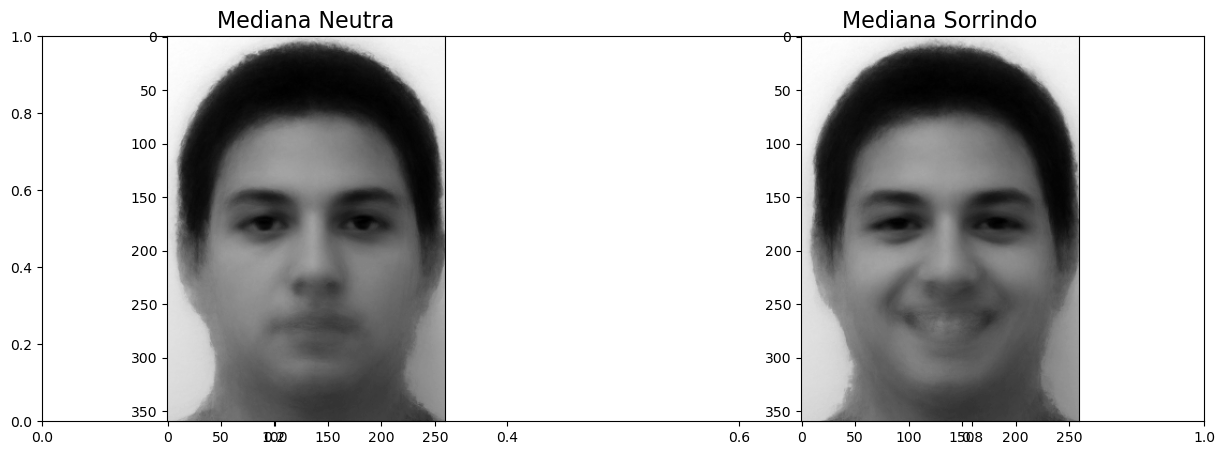

In [84]:
# =============================
# 📊 Comparação visual das medianas
# =============================
plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.imshow(median_file_neutral, cmap="gray")
plt.title("Mediana Neutra", fontsize=16)

plt.subplot(1, 2, 2)
plt.imshow(median_file_smiling, cmap="gray")
plt.title("Mediana Sorrindo", fontsize=16)

plt.show()


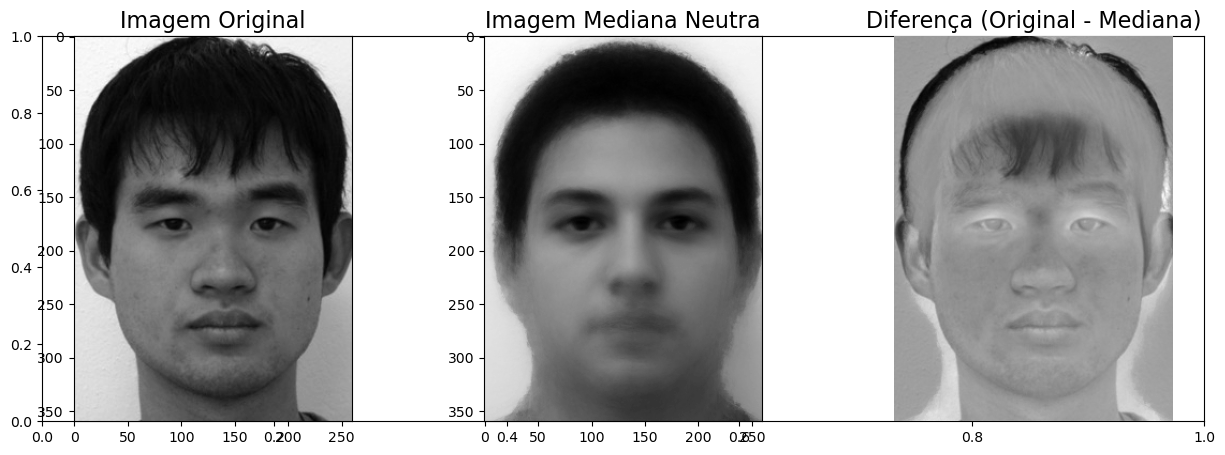

In [90]:
# =============================
# 📏 Diferença entre imagens e medianas
# =============================

# Exemplo com uma imagem do conjunto
img_idx = 1
diferenca_mediana = dataset_neutral[img_idx, :, :] - median_file_neutral

plt.subplots(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(dataset_neutral[img_idx, :, :], cmap="gray")
plt.title("Imagem Original", fontsize=16)

plt.subplot(1, 3, 2)
plt.imshow(median_file_neutral, cmap="gray")
plt.title("Imagem Mediana Neutra", fontsize=16)

plt.subplot(1, 3, 3)
plt.imshow(diferenca_mediana, cmap="gray")
plt.title("Diferença (Original - Mediana)", fontsize=16)
plt.axis("off")

plt.show()


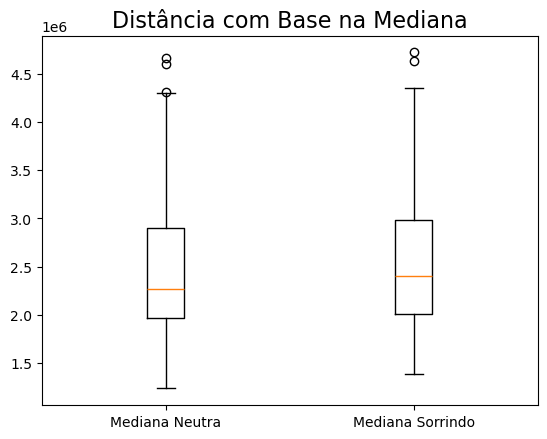

In [86]:
# =============================
# 📦 Distâncias entre imagens e medianas
# =============================
indice = dataset_neutral.shape[0]
dif_neutral_median_neutral = np.zeros([indice])
dif_neutral_median_smiling = np.zeros([indice])

for img in range(indice):
    dif_neutral_median_neutral[img] = np.sum(abs(dataset_neutral[img, :, :] - median_file_neutral))
    dif_neutral_median_smiling[img] = np.sum(abs(dataset_neutral[img, :, :] - median_file_smiling))

dif_median = np.stack((dif_neutral_median_neutral, dif_neutral_median_smiling), axis=1)

plt.boxplot(dif_median)
plt.title("Distância com Base na Mediana", fontsize=16)
plt.xticks([1, 2], ["Mediana Neutra", "Mediana Sorrindo"])
plt.show()

## Moda

##### Exemplo passo a passo de como obter a moda

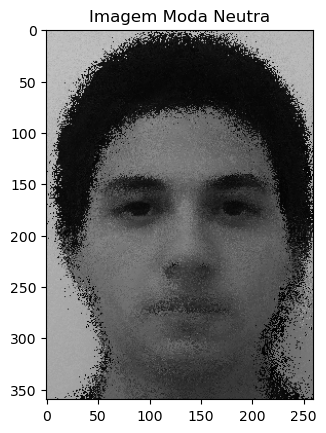

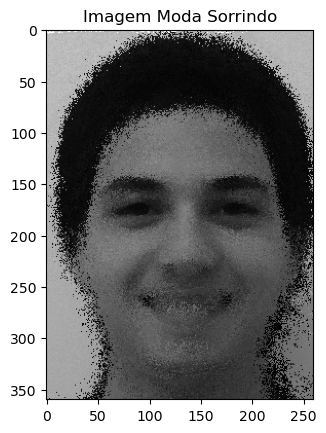

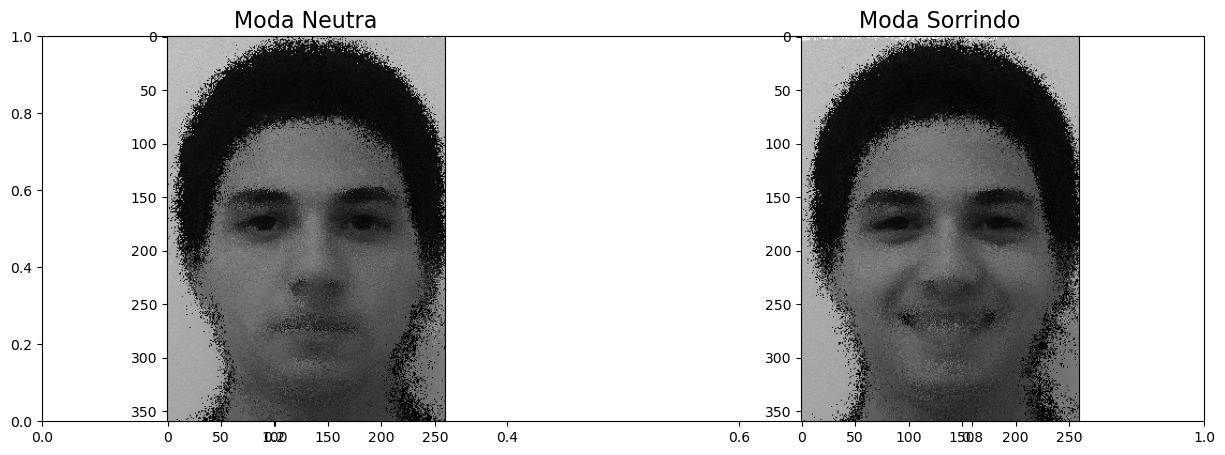

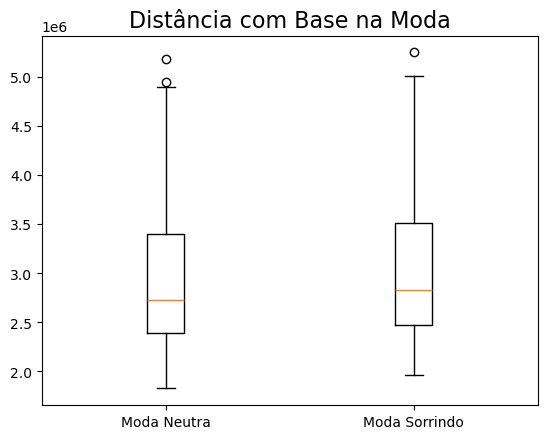

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob
from scipy.stats import mode

# =============================
# 😐 Dataset neutro
# =============================
dataset_neutral = []
for file in glob.glob('frontalimages_manuallyaligned_part1/*a.jpg'):
    img = Image.open(file).convert("L")
    dataset_neutral.append(np.array(img))
dataset_neutral = np.array(dataset_neutral)

# Calcular imagem moda neutra
arr_neutral = dataset_neutral.reshape(dataset_neutral.shape[0], -1)
modes_neutral, _ = mode(arr_neutral, axis=0)
mode_file_neutral = modes_neutral.reshape(dataset_neutral.shape[1], dataset_neutral.shape[2])

plt.imshow(mode_file_neutral, cmap="gray")
plt.title("Imagem Moda Neutra")
plt.show()

# =============================
# 😁 Dataset sorrindo
# =============================
dataset_smiling = []
for file in glob.glob('frontalimages_manuallyaligned_part1/*b.jpg'):
    img = Image.open(file).convert("L")
    dataset_smiling.append(np.array(img))
dataset_smiling = np.array(dataset_smiling)

# Calcular imagem moda sorrindo
arr_smiling = dataset_smiling.reshape(dataset_smiling.shape[0], -1)
modes_smiling, _ = mode(arr_smiling, axis=0)
mode_file_smiling = modes_smiling.reshape(dataset_smiling.shape[1], dataset_smiling.shape[2])

plt.imshow(mode_file_smiling, cmap="gray")
plt.title("Imagem Moda Sorrindo")
plt.show()

# =============================
# 📊 Comparação visual das modas
# =============================
plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.imshow(mode_file_neutral, cmap="gray")
plt.title("Moda Neutra", fontsize=16)

plt.subplot(1, 2, 2)
plt.imshow(mode_file_smiling, cmap="gray")
plt.title("Moda Sorrindo", fontsize=16)

plt.show()

# =============================
# 📏 Diferenças e Boxplot
# =============================
indice = dataset_neutral.shape[0]
dif_neutral_moda_neutral = np.zeros(indice)
dif_neutral_moda_smiling = np.zeros(indice)

for img in range(indice):
    dif_neutral_moda_neutral[img] = np.sum(abs(dataset_neutral[img, :, :] - mode_file_neutral))
    dif_neutral_moda_smiling[img] = np.sum(abs(dataset_neutral[img, :, :] - mode_file_smiling))

dif_moda = np.stack((dif_neutral_moda_neutral, dif_neutral_moda_smiling), axis=1)

plt.boxplot(dif_moda)
plt.title("Distância com Base na Moda", fontsize=16)
plt.xticks([1, 2], ["Moda Neutra", "Moda Sorrindo"])
plt.show()


### Obtendo a moda do conjunto de dados

# Comparação de todos os padrões

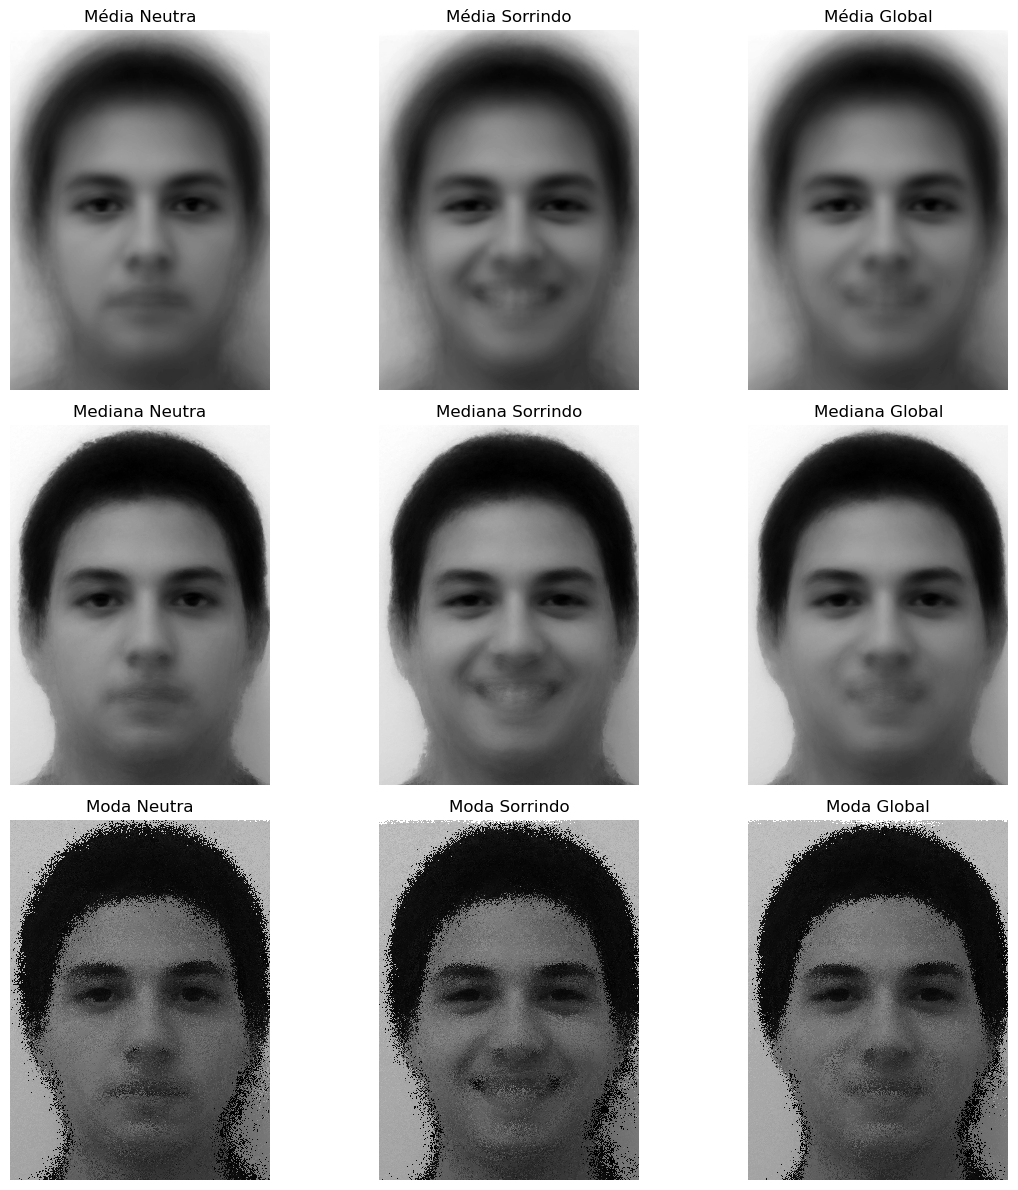

C:\Users\FACULDADE\AppData\Local\Temp\ipykernel_66264\2611559885.py:130: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


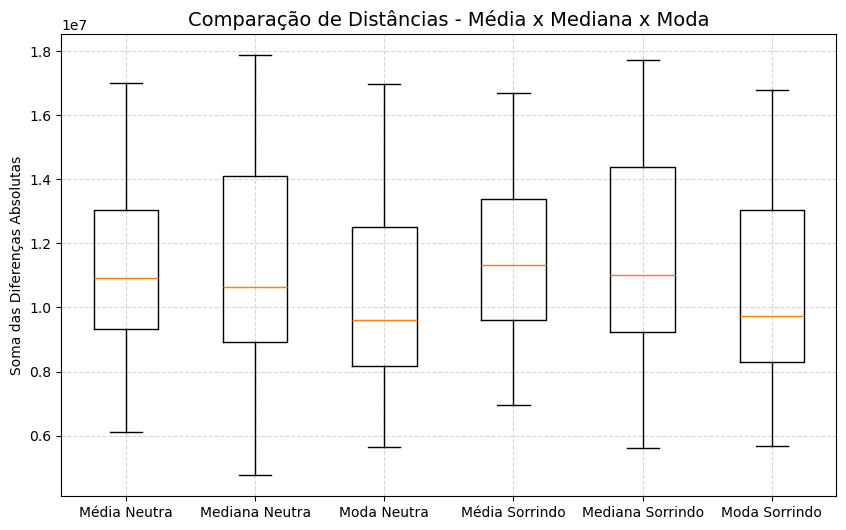

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob
from scipy.stats import mode

# =============================
# 🧠 Função auxiliar para carregar imagens
# =============================
def carregar_dataset(padrao):
    dataset = []
    for file in glob.glob(f'frontalimages_manuallyaligned_part1/*{padrao}.jpg'):
        img = Image.open(file).convert("L")
        dataset.append(np.array(img))
    return np.array(dataset)

# =============================
# 📂 Carregar datasets
# =============================
dataset_neutral = carregar_dataset('a')
dataset_smiling = carregar_dataset('b')
dataset_global = np.concatenate((dataset_neutral, dataset_smiling), axis=0)

# =============================
# 🔢 Funções para média, mediana e moda
# =============================
def calcular_media(dataset):
    return np.round(np.mean(dataset, axis=0)).astype(np.uint8)

def calcular_mediana(dataset):
    return np.median(dataset, axis=0).astype(np.uint8)

def calcular_moda(dataset):
    arr = dataset.reshape(dataset.shape[0], -1)
    modes, _ = mode(arr, axis=0)
    return modes.reshape(dataset.shape[1], dataset.shape[2]).astype(np.uint8)

# =============================
# 🧮 Calcular as três métricas para cada tipo
# =============================
mean_neutral = calcular_media(dataset_neutral)
mean_smiling = calcular_media(dataset_smiling)
mean_global = calcular_media(dataset_global)

median_neutral = calcular_mediana(dataset_neutral)
median_smiling = calcular_mediana(dataset_smiling)
median_global = calcular_mediana(dataset_global)

mode_neutral = calcular_moda(dataset_neutral)
mode_smiling = calcular_moda(dataset_smiling)
mode_global = calcular_moda(dataset_global)

# =============================
# 🖼️ Mostrar comparação 3x3 (Média, Mediana, Moda × Neutro, Sorrindo, Global)
# =============================
plt.figure(figsize=(12, 12))

# Linha 1 – MÉDIA
plt.subplot(3, 3, 1)
plt.imshow(mean_neutral, cmap='gray')
plt.title('Média Neutra')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(mean_smiling, cmap='gray')
plt.title('Média Sorrindo')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(mean_global, cmap='gray')
plt.title('Média Global')
plt.axis('off')

# Linha 2 – MEDIANA
plt.subplot(3, 3, 4)
plt.imshow(median_neutral, cmap='gray')
plt.title('Mediana Neutra')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(median_smiling, cmap='gray')
plt.title('Mediana Sorrindo')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.imshow(median_global, cmap='gray')
plt.title('Mediana Global')
plt.axis('off')

# Linha 3 – MODA
plt.subplot(3, 3, 7)
plt.imshow(mode_neutral, cmap='gray')
plt.title('Moda Neutra')
plt.axis('off')

plt.subplot(3, 3, 8)
plt.imshow(mode_smiling, cmap='gray')
plt.title('Moda Sorrindo')
plt.axis('off')

plt.subplot(3, 3, 9)
plt.imshow(mode_global, cmap='gray')
plt.title('Moda Global')
plt.axis('off')

plt.tight_layout()
plt.show()

# =============================
# 📈 Comparação numérica das diferenças
# =============================
indice = dataset_neutral.shape[0]
def soma_dif(dataset, ref):
    return np.array([np.sum(abs(dataset[i, :, :] - ref)) for i in range(dataset.shape[0])])

# Calcular diferenças para neutro
dif_mean_neutral = soma_dif(dataset_neutral, mean_global)
dif_median_neutral = soma_dif(dataset_neutral, median_global)
dif_mode_neutral = soma_dif(dataset_neutral, mode_global)

# Calcular diferenças para sorrindo
dif_mean_smiling = soma_dif(dataset_smiling, mean_global)
dif_median_smiling = soma_dif(dataset_smiling, median_global)
dif_mode_smiling = soma_dif(dataset_smiling, mode_global)

# =============================
# 📊 Boxplot comparando padrões
# =============================
plt.figure(figsize=(10, 6))
plt.boxplot(
    [dif_mean_neutral, dif_median_neutral, dif_mode_neutral,
     dif_mean_smiling, dif_median_smiling, dif_mode_smiling],
    labels=[
        'Média Neutra', 'Mediana Neutra', 'Moda Neutra',
        'Média Sorrindo', 'Mediana Sorrindo', 'Moda Sorrindo'
    ]
)
plt.title('Comparação de Distâncias - Média x Mediana x Moda', fontsize=14)
plt.ylabel('Soma das Diferenças Absolutas')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
